In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

pd.set_option('display.max_columns', 30)
breast_cancer = load_breast_cancer()

x = pd.DataFrame(breast_cancer.data, columns=[breast_cancer.feature_names])
y = pd.Series(breast_cancer.target)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

logistic = LogisticRegression(C=95, penalty='l1', solver='liblinear', max_iter=1000)
logistic.fit(x_train, y_train)

result = logistic.score(x_test, y_test)
print('Score: ', result)

Score:  0.9766081871345029


In [3]:
predict = logistic.predict_proba(x_test)

In [4]:
probas = predict[:, 1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probas)

print('TPR: ', tpr)
print('FPR: ', fpr)
print('Threshold: ', thresholds)

TPR:  [0.         0.00917431 0.94495413 0.94495413 0.98165138 0.98165138
 0.99082569 0.99082569 1.         1.        ]
FPR:  [0.         0.         0.         0.03225806 0.03225806 0.0483871
 0.0483871  0.11290323 0.11290323 1.        ]
Threshold:  [2.00000000e+00 9.99999997e-01 8.93966937e-01 8.75491486e-01
 7.01783040e-01 6.55706932e-01 6.16876471e-01 1.73763260e-01
 1.25573050e-01 2.11758604e-50]


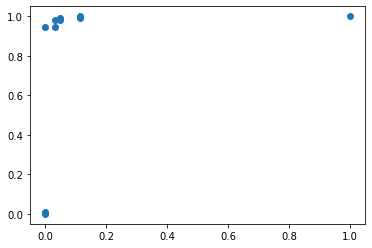

In [8]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
ra_score = roc_auc_score(y_test, probas)

print('AUC: ', ra_score)

AUC:  0.9973364900858241
